# Ujian Arrythmia Manajemen Big data

menggunakan dataset: arrythmia

## Tahapan 1: menentukan obyektifitas bisnis
yang perlu dilakukan adalah memahami data


### meload Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')


Mounted at /content/drive


### meload library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

### meload data

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/processed_cleveland.csv', sep=',')

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


**catatan**: karena dari dataset tidak ada nama fitur, maka fitur kita namai sendiri

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Tahapan 3: Menelaah Data

### type data

In [8]:
type(dataset)

pandas.core.frame.DataFrame

### melihat ukuran dataset

In [9]:
dataset.shape

(303, 14)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


**catatan**: data nya aneh, harusnya int64 semua, tapi ada yang bertipe object, ternyata ada tanda ?. dari sini saya simpulkan bahwa tanda tanya adalah penanda data tersebut tidak ada isinya (missing values)

### cek jumlah class

In [11]:
dataset['num'].unique()

array([0, 2, 1, 3, 4])

In [12]:
dataset['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

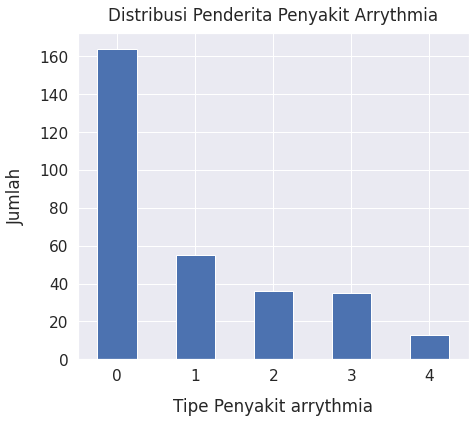

In [13]:
sns.set(font_scale=1.4)
dataset['num'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Tipe Penyakit arrythmia", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Arrythmia", y=1.02);

### deskripsi dataset

In [14]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# Tahapan 4: Memvalidasi Data

## memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

In [15]:
dataset.replace("?", np.nan, inplace= True)

In [16]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


sekarang kita perbaiki data yang hilang

In [17]:
dataset.isnull().values.any()

True

In [18]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['ca', 'thal'], dtype='object')

In [19]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

ca      1.320132
thal    0.660066
dtype: float64

catatan: 
- karena nilai yang hilang, tidak banyak, maka kita bisa menggunakan **replace missing values**

- jika data yang hilang diatas 50%, maka kita **remove missing values**

# Tahapan 6: Membersihkan data
- perbaiki data yang hilang
- hapus data duplikat
- cek fitur konstant

### memperbaiki data yang hilang

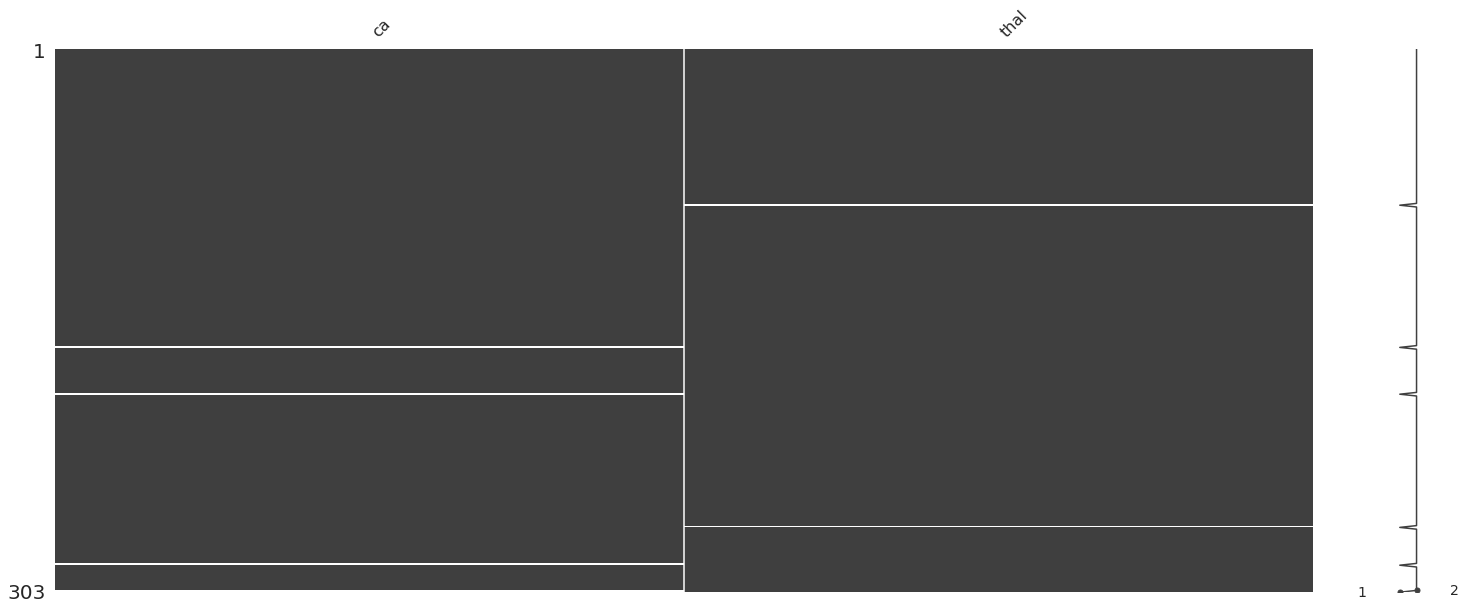

In [20]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [21]:
median_value=dataset['ca'].median()
dataset['ca']=dataset['ca'].fillna(median_value)

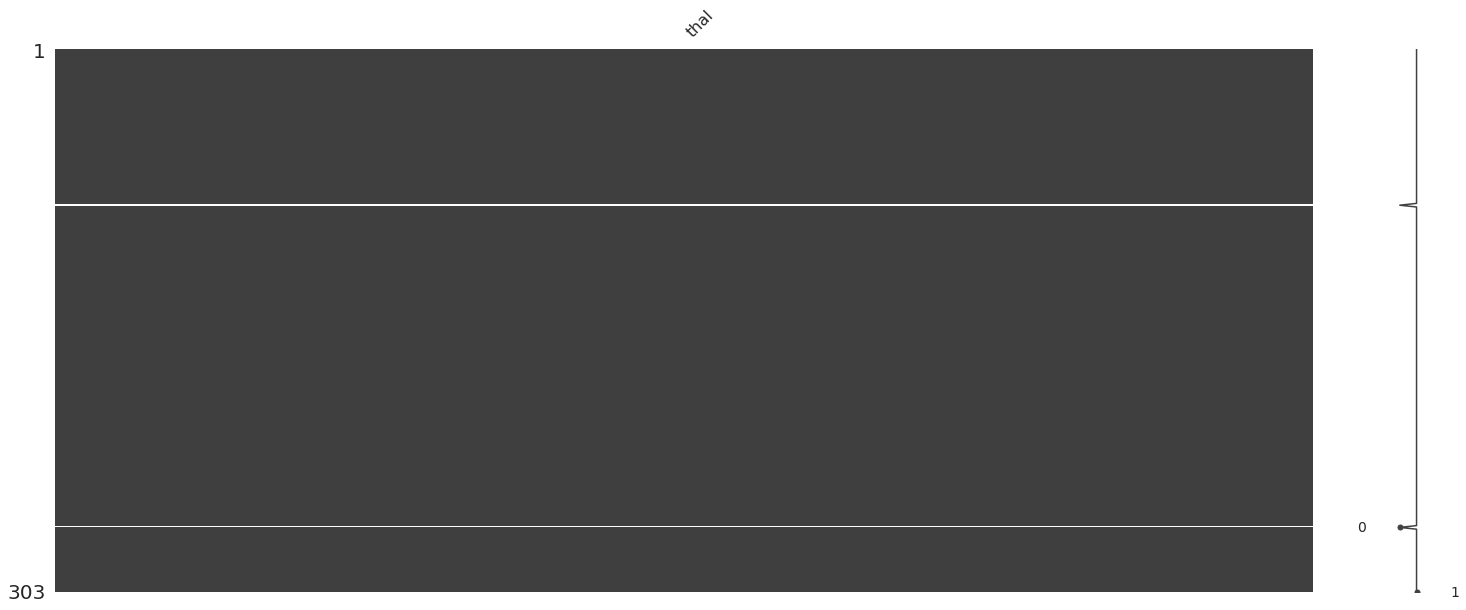

In [22]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [23]:
median_value=dataset['thal'].median()
dataset['thal']=dataset['thal'].fillna(median_value)

In [24]:
median_value

3.0

### menghapus data duplikat

In [25]:
dataset.shape

(303, 14)

In [26]:
dataset.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [27]:
dataset.shape

(303, 14)

### hapus fitur(kolom) yang bernilai konstan

In [28]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [29]:
dataset.shape

(303, 14)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [31]:
dataset['ca'] = dataset['ca'].astype(float)
dataset['thal'] = dataset['thal'].astype(float)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [33]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [34]:
#Membuat fungsi
def getAnalysis(score):
  if score==0:
    return '0'
  else:
    return '1'

dataset['NewLabel'] = dataset['num'].apply(getAnalysis)

In [35]:
dataset['NewLabel'].value_counts()

0    164
1    139
Name: NewLabel, dtype: int64

# Tahapan 7: Mengkonstruksi data

transformasi data bisa berupa:
- menjadi PCA

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
 14  NewLabel  303 non-null    object 
dtypes: float64(3), int64(11), object(1)
memory usage: 35.6+ KB


### lakukan pembagian dataset menjadi training dan testing

In [37]:
y = dataset['NewLabel']

In [38]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: NewLabel, Length: 303, dtype: object

In [39]:
dataset = dataset.drop(['num'], 1)

<ipython-input-39-8fee13a0a864>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop(['num'], 1)


In [40]:
X = dataset.drop(['NewLabel'], 1)

<ipython-input-40-e95fa614b8b4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop(['NewLabel'], 1)


In [41]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


### dataset original

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2022)

## - Mencoba Menggunakan Data Normalisasi

### data original diberi perlakuan normalisasi


In [43]:
X_norm = StandardScaler().fit_transform(X)

In [44]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

## - (new) Original PCA

In [45]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of lungs_pca:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of lungs_pca:           0          1          2          3         4         5         6   \
0 -12.665422   2.816279  14.992618   6.795984 -1.078475  0.682857  0.173881   
1  41.303628  45.289369  21.823962   0.083864  2.739570  0.989639 -0.770195   
2 -17.676068  21.578740 -11.567503  11.126278 -2.462890  1.279392 -0.621257   
3   2.400054 -39.913487   0.825560 -10.702652 -0.059102  2.973355  2.149224   
4 -43.291675 -23.860984   1.860055  -7.886838  1.204136  1.211934 -0.565039   

         7         8         9         10        11        12  
0  2.867288 -0.174296  0.733162 -0.286089 -0.324111  0.628685  
1 -1.185863  1.360030  0.080962 -0.751188 -0.060823 -0.485932  
2 -0.100121  0.123092 -0.217923 -0.196525  0.289632 -0.192335  
3  0.110518 -0.621591  0.560694 -0.350934 -0.616951 -0.161037  
4  0.991922  0.165271 -0.447878  0.749352  0.499795  0.078749  
Explained variance ratio: [7.46500715e-01 1.50077697e-01 8.51123741e-02 1.61233450e-02
 1.02191774e-03 3.31412482e-04 2.5

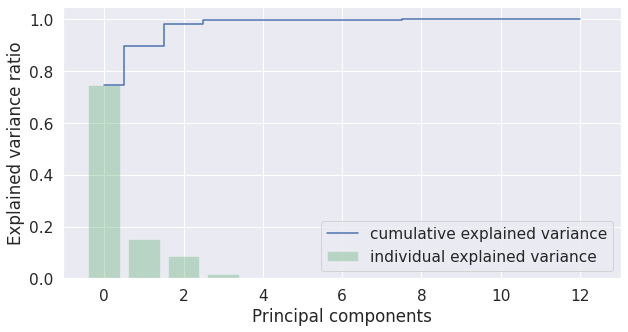

Cumulative explained ratio: [0.74650071 0.89657841 0.98169079 0.99781413 0.99883605 0.99916746
 0.99942065 0.99964371 0.99981931 0.99987862 0.99992752 0.99996796
 1.        ]


In [46]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

yang mendekati 0.9 ada di point 27

In [47]:
pca = PCA(n_components=3, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = 
                       ['PC1', 'PC2','PC3'
                        ])

In [48]:
ori_pca

,PC1,PC2,PC3
0,-12.665422,2.816279,14.992618
1,41.303628,45.289369,21.823962
2,-17.676068,21.578740,-11.567503
3,2.400054,-39.913487,0.825560
4,-43.291675,-23.860984,1.860055
...,...,...,...
298,15.874379,12.956685,-25.698882
299,-52.404646,13.137756,15.630417
300,-115.314206,36.033775,0.420619
301,-10.749050,-23.443452,2.418430


In [49]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

## - (new) Normalisasi PCA

In [50]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of lungs_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of lungs_pca:          0         1         2         3         4         5         6   \
0  1.162722  0.929622  3.212341  2.248647 -0.117105  0.164221  0.966571   
1  3.217830  1.451021 -0.481532 -0.849814  0.138780 -0.631340  0.403677   
2  3.143604 -0.636569 -0.364301 -0.607485 -0.045832 -1.003931  0.681505   
3 -0.464908 -1.409706  0.395323  2.797258 -0.874659 -0.160742 -0.644582   
4 -2.268663  0.388683 -0.068956  1.170135 -0.839176 -0.141872  0.729038   

         7         8         9         10        11        12  
0  0.596128 -1.484567 -0.453161 -0.222642 -0.497023  0.086506  
1 -1.058591  0.419353  1.475782  1.032829  0.942472  1.078691  
2 -0.185650  0.057853  0.470704 -0.340281 -0.895176 -0.230836  
3  2.159004  0.877933  0.243848  1.545183 -0.170085  0.508931  
4 -0.033008  1.067675  0.553453 -0.912098  0.281023 -1.100292  
Explained variance ratio: [0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.03526

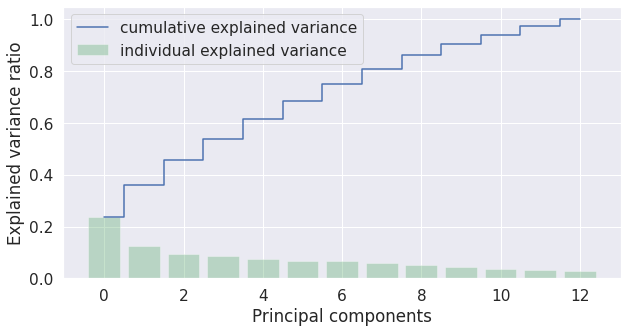

Cumulative explained ratio: [0.23687279 0.35994417 0.45525771 0.53959809 0.61542842 0.68335886
 0.74987574 0.80971274 0.86259744 0.90594572 0.94120605 0.97278203
 1.        ]


In [51]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

yang mendekati 0.9 ada di poin 78

In [52]:
pca = PCA(n_components=10, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = 
                        [
                         'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'
                        ])


In [53]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

# Tahapan 8: Membangun Model

- disini saya memakai KNN
- metriks yang dicari menggunakan akurasi, presisi dan recall
- membandingkan antara data original dengan data PCA

### siapkan parameter untuk KNN

In [54]:
xxx = np.arange(1,21)
xxx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [55]:
parameters_dt = {
            'model__n_neighbors' : np.arange(1,10),
            'model__algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')
}


### lakukan pemodelan KNN dengan parameter yang optimal

In [56]:
classifier_dt_pipeline = Pipeline([
                          ('model',KNeighborsClassifier())                                            
                          ])

### pemodelan dengan data original

In [57]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [58]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ('auto', 'ball_tree', 'kd_tree',
                                              'brute'),
                         'model__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [59]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=9))])

In [60]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__algorithm: 'auto'
model__n_neighbors: 9


### pemodelan dengan data normal

In [61]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [62]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ('auto', 'ball_tree', 'kd_tree',
                                              'brute'),
                         'model__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=7))])

In [64]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__algorithm: 'auto'
model__n_neighbors: 7


### (new) pemodelan dengan data original PCA

In [65]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [66]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ('auto', 'ball_tree', 'kd_tree',
                                              'brute'),
                         'model__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [67]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=7))])

In [68]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__algorithm: 'auto'
model__n_neighbors: 7


### (new) pemodelan dengan data normal PCA

In [69]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [70]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ('auto', 'ball_tree', 'kd_tree',
                                              'brute'),
                         'model__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [71]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model', KNeighborsClassifier())])

In [72]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__algorithm: 'auto'
model__n_neighbors: 5


# Tahapan 10: Mengevaluasi Hasil Pemodelan

## evaluasi dengan data original

In [73]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6942148760330579
Precision pada training set:  0.6942148760330579
Recall pada training set:  0.6942148760330579
Akurasi pada test set:  0.7213114754098361
Precision pada test set:  0.7213114754098361
Recall pada test set:  0.7213114754098361


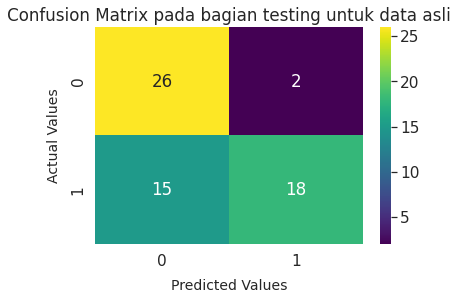

In [74]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## evaluasi dengan data normal

In [75]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8820754716981132
Precision pada training set:  0.8820754716981132
Recall pada training set:  0.8820754716981132
Akurasi pada test set:  0.7582417582417582
Precision pada test set:  0.7582417582417582
Recall pada test set:  0.7582417582417582


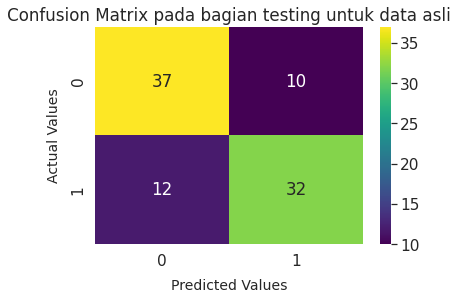

In [76]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## (new) evaluasi dengan data original PCA

In [77]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.7028301886792453
Precision pada training set:  0.7028301886792453
Recall pada training set:  0.7028301886792453
Akurasi pada test set:  0.6153846153846154
Precision pada test set:  0.6153846153846154
Recall pada test set:  0.6153846153846154


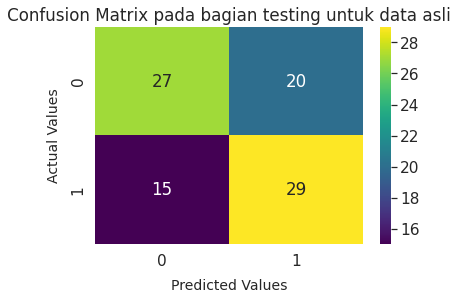

In [78]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## (new) evaluasi dengan data normal PCA

In [79]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.8820754716981132
Precision pada training set:  0.8820754716981132
Recall pada training set:  0.8820754716981132
Akurasi pada test set:  0.7912087912087912
Precision pada test set:  0.7912087912087912
Recall pada test set:  0.7912087912087912


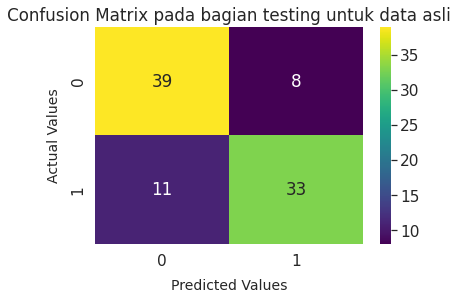

In [80]:
sns.heatmap(confusion_matrix(Y_test_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Tahapan 11: melakukan proses review

In [81]:
models = [
          ('KNN Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('KNN Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('KNN PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),    
          ('KNN PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),      
         ]

In [82]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,KNN Data Original,0.694215,0.721311
1,KNN Data Normalisasi,0.882075,0.758242
2,KNN PCA Data Original,0.702830,0.615385
3,KNN PCA Data Normalisasi,0.882075,0.791209


In [83]:
models_comparison = [
                        ('KNN Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test), 
                        ('KNN Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('KNN Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('KNN PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),                  
                    ]

In [84]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,KNN Data Original,0.721311,0.721311,0.721311
1,KNN Data Normalisasi,0.758242,0.758242,0.758242
2,KNN Data Original,0.615385,0.615385,0.615385
3,KNN PCA Data Normalisasi,0.791209,0.791209,0.791209


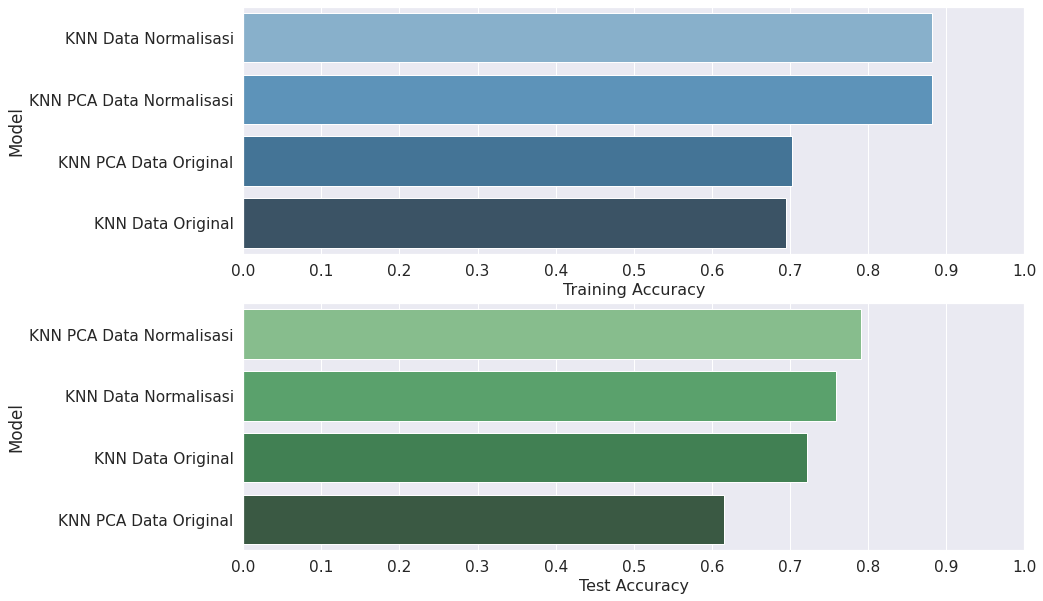

In [85]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

**Kesimpulan**:
- silakan isi